<a href="https://colab.research.google.com/github/Rifanuraa/japan_hostel_recomendation_system/blob/main/Sistem_Rekomendasi_hostel_di_jepang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

Data set ini merupakan dataset yang berisi informasi mengenai lebih dari 300 hostel yang ada di Jepang.

Sumber data : Kaggle = https://www.kaggle.com/datasets/koki25ando/hostel-world-dataset/data

# Goal

Kita bekerja di agensi travel. Perusahaan kita bertanggung jawab membantu klien menyiapkan dan merencanakan perjalanan mereka.

Setiap tahun tim sales marketing yang sering kewalahan dengan permintaan klien yang memakai jasa travel kita secara rombongan karena perlu ada penyesuaian dengan keinginan mereka yang kebanyakan akan pergi berwisata ke Tokyo Jepang.


Permasalahan

Tim Customer Specialist merasa kesusahan memfilter data tempat hostel berdasar Rating dan Harga. Butuh pemrosesan khusus untuk menggambungkan rating yang merupakan data numerikal dan kategori yang merupakan data kategorikal.

Tujuan

Membuat sistem rekomendasi hostel di Tokyo, Jepang. berdasarkan Rating dan Harga. sehingga Tim Customer Specialist mudah merekomendasikan tempat tempat yang serupa jika terjadi penolakan dalam penyusunan itinerary perjalanan wisata ke tokyo jepang.

In [113]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# Data Collection and Preparation

Pada tahap Data collection and preparation akan dilakukan, pengumpulan data dan menyiapkan data untuk di proses lebih lanjut. Dimana dalam proses pengumpulan data akan dilakukan, load data, membersihkan data, menyederhanakan data, serta menambahkan fitur engineering dan normalisasi pada data.

#### Load data

In [114]:

hostel_df = pd.read_csv("https://raw.githubusercontent.com/Rifanuraa/japan_hostel_recomendation_system/main/hostel%20.csv")
print("ukuran hostel_df: ", hostel_df.shape)



ukuran hostel_df:  (342, 16)


In [115]:
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


#### Melihat informasi keseluruhan mengenai tabel

In [116]:
hostel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     342 non-null    int64  
 1   hostel.name    342 non-null    object 
 2   City           342 non-null    object 
 3   price.from     342 non-null    int64  
 4   Distance       342 non-null    object 
 5   summary.score  327 non-null    float64
 6   rating.band    327 non-null    object 
 7   atmosphere     327 non-null    float64
 8   cleanliness    327 non-null    float64
 9   facilities     327 non-null    float64
 10  location.y     327 non-null    float64
 11  security       327 non-null    float64
 12  staff          327 non-null    float64
 13  valueformoney  327 non-null    float64
 14  lon            298 non-null    float64
 15  lat            298 non-null    float64
dtypes: float64(10), int64(2), object(4)
memory usage: 42.9+ KB


dari informasi tersebut, kita dapat melihat bahwa terdapat missing value di beberapa kolom seperti :
1. summary.score  
2. rating.band    
3. atmosphere     
4. cleanliness    
5. facilities     
6. location.y     
7. security       
8. staff          
9. valueformoney  
10. lon         
11. lat      



#### Memfilter Data

Kemudian kita harus memfilter data karena kita akan fokus pada tempat wisata di Tokyo

In [117]:
#filtering kota tokyo
hostel_df = hostel_df.loc[hostel_df['City']=='Tokyo']

#### Drop kolom yang tidak diperlukan

Karena kita akan memproses data berdasarkan Harga, rating serta jarak dari pusat kota  maka kolom yang diperlukan hanya :

1. hostel.name
2. City
3. price.from
4. Distance
5. rating.band

In [118]:
#drop kolom yang tidak digunakan
columns = ['summary.score','atmosphere','cleanliness', 'facilities','location.y','security','staff','valueformoney','lon','lat']

In [119]:
#drop kolom
hostel_df = hostel_df.drop(columns, axis=1)

In [120]:
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,rating.band
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,Fabulous
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,Very Good
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,Superb
5,6,1night1980hostel Tokyo,Tokyo,2100,9.4km from city centre,Very Good
6,7,328 Hostel & Lounge,Tokyo,3300,16.5km from city centre,Superb


In [121]:
#menegcek baris data yang kosong
hostel_df.isna().sum()

Unnamed: 0     0
hostel.name    0
City           0
price.from     0
Distance       0
rating.band    5
dtype: int64

In [122]:
hostel_df = hostel_df.dropna()

In [123]:
hostel_df.isna().sum()

Unnamed: 0     0
hostel.name    0
City           0
price.from     0
Distance       0
rating.band    0
dtype: int64

# Penyederhanaan Data

Dilakukan penyederhanaan data pada kolom `Distance` yaitu dengan hanya mengambil value angka pada kolom tersebut serta memisahkan angka dengan kalimat atau kata-kata yang terdapat dalam kolom tersebut.

**Contoh :**

**Distance sebelum disederhanakan:**

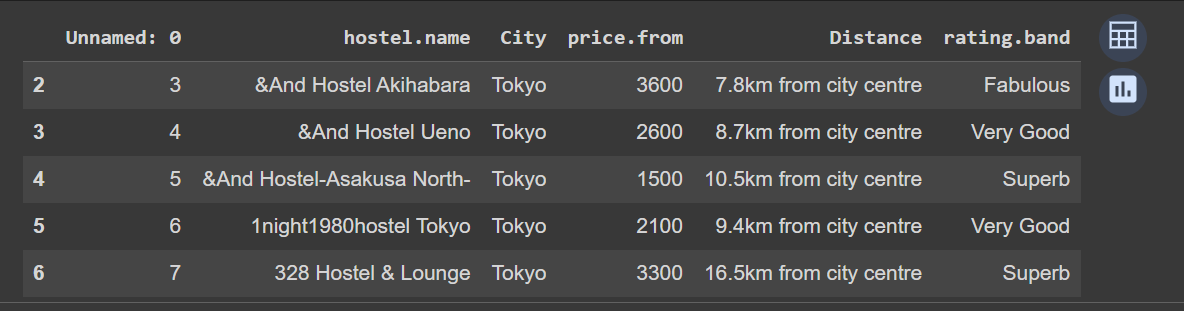


**Distance Setelah disederhanakan:**

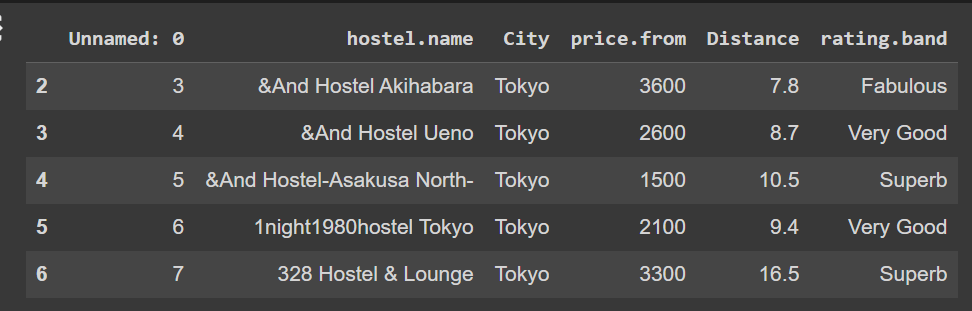

In [124]:
#Untuk menampilkan hasil sebelum disederhanakan
print("Distance sebelum disederhanakan:", hostel_df['Distance'].head(2))

# mengambil angka dalam satuan km saja dengan pemisah spasi
splitted_distance = lambda x: x.split(' ')[0]

# merubah isi nilai "Kota, Provinsi" menjadi "Kota" di kolom Location
hostel_df['Distance'] = hostel_df['Distance'].apply(splitted_distance)

#Untuk menampilkan hasil setelah disederhanakan
print("Distance setelah disederhanakan:",hostel_df['Distance'].head(2))


Distance sebelum disederhanakan: 2    7.8km from city centre
3    8.7km from city centre
Name: Distance, dtype: object
Distance setelah disederhanakan: 2    7.8km
3    8.7km
Name: Distance, dtype: object


In [125]:
# memisahka km dari angka pada kolom distance
print("Distance sebelum disederhanakan:", hostel_df['Distance'].head(2))

# mengambil angka dalam satuan km saja dengan pemisah spasi
splitted_distance = lambda x: x.split('km')[0]

# merubah isi nilai "Kota, Provinsi" menjadi "Kota" di kolom Location
hostel_df['Distance'] = hostel_df['Distance'].apply(splitted_distance)

#Untuk menampilkan hasil setelah disederhanakan
print("Distance setelah disederhanakan:",hostel_df['Distance'].head(2))


Distance sebelum disederhanakan: 2    7.8km
3    8.7km
Name: Distance, dtype: object
Distance setelah disederhanakan: 2    7.8
3    8.7
Name: Distance, dtype: object


In [126]:
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,rating.band
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,Fabulous
3,4,&And Hostel Ueno,Tokyo,2600,8.7,Very Good
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,Superb
5,6,1night1980hostel Tokyo,Tokyo,2100,9.4,Very Good
6,7,328 Hostel & Lounge,Tokyo,3300,16.5,Superb


#### Mengganti nama  dan tipe data kolom

Tujuan Mengganti nama  dan tipe data kolom adalah untuk memudahkan pemrosesan data.

In [127]:
#mengganti nama kolom
hostel_df = hostel_df.rename(columns={'Unnamed: 0': 'id.hostel','rating.band': 'rating', 'City' : 'city', 'Distance' : 'distance'})
hostel_df.head()

,id.hostel,hostel.name,city,price.from,distance,rating
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,Fabulous
3,4,&And Hostel Ueno,Tokyo,2600,8.7,Very Good
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,Superb
5,6,1night1980hostel Tokyo,Tokyo,2100,9.4,Very Good
6,7,328 Hostel & Lounge,Tokyo,3300,16.5,Superb


In [128]:
hostel_df = hostel_df.astype({'distance': 'float'})

#df = df.astype({'Kolom1': 'float', 'Kolom2': 'category'})

**Mengubah tipe data kolom distance**

In [129]:
hostel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 2 to 341
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id.hostel    122 non-null    int64  
 1   hostel.name  122 non-null    object 
 2   city         122 non-null    object 
 3   price.from   122 non-null    int64  
 4   distance     122 non-null    float64
 5   rating       122 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.7+ KB


In [130]:
#mengecek daftar rating yang unik
hostel_df.rating.unique()

array(['Fabulous', 'Very Good', 'Superb', 'Rating', 'Good'], dtype=object)

In [131]:
hostel_df = hostel_df.drop(hostel_df[hostel_df['rating'] == 'Rating'].index)

In [132]:
hostel_df.rating.unique()

array(['Fabulous', 'Very Good', 'Superb', 'Good'], dtype=object)

# Feature Engineering

### One Hot Encode

melakukan transformasi terhadap kolom rating yang beritisi ('Superb','Fabulous', 'Very Good', 'Good') Value kategori tersebut diubah menjadi kolom, dengan value 1 atau 0.

In [133]:
# salin data ke dataframe baru dengan metode [dataframe_name].copy()
processed_hostel_df = hostel_df[['price.from', 'distance',]].copy()

# menampilkan dataframe tempat wisata hanya 1 baris pertama
processed_hostel_df.head(1)

,price.from,distance
2,3600,7.8


In [134]:
# melakukan one hot encoding pada kolom City dengan metode pd.get_dummies()
rating_encoded = pd.get_dummies(hostel_df['rating'])


# menggabungkan hasil one hot encoding kolom City dengan kolom Category
processed_hostel_df = pd.concat([processed_hostel_df, rating_encoded], axis=1)

processed_hostel_df.head()

,price.from,distance,Fabulous,Good,Superb,Very Good
2,3600,7.8,1,0,0,0
3,2600,8.7,0,0,0,1
4,1500,10.5,0,0,1,0
5,2100,9.4,0,0,0,1
6,3300,16.5,0,0,1,0


# EDA

pertanyaan analisis:

1. Apakah semakin kecil jarak hostel dengan pusat kota maka harganya semakin besar ?
2. Bagaimana karakteristik hostel yang ada di tokyo jepang ?

### Apakah semakin kecil jarak hostel dengan pusat kota maka harganya semakin besar ?



*   Teknik analisis: heatmaps
*   Data: scaled_hostel_df





In [135]:
scaled_hostel_df.head()

,price.from,distance,Fabulous,Good,Superb,Very Good
0,-0.082254,-0.144529,1.432230,-0.130744,-1.115922,-0.334887
1,-0.093203,0.122351,-0.698212,-0.130744,-1.115922,2.986079
2,-0.105247,0.656113,-0.698212,-0.130744,0.896120,-0.334887
3,-0.098677,0.329925,-0.698212,-0.130744,-1.115922,2.986079
4,-0.085539,2.435318,-0.698212,-0.130744,0.896120,-0.334887


kita akan menghitung nilai korelasi antara dua variable untuk mengetahui potensi kedua variable tersebut saling berhubungan atau tidak.

Pairwise Correlation: dataframe_name.corr()

In [136]:
corr = scaled_hostel_df.drop(["Fabulous","Good",	"Superb",	"Very Good"],axis=1).corr()
corr

,price.from,distance
price.from,1.000000,-0.099051
distance,-0.099051,1.000000


In [137]:
import plotly.express as px
fig = px.imshow(corr, text_auto=True)
fig.show()

Hubungan harga dengan jarak hostel dari pusat kota memiliki korelasi negatif yang kuat, yang artinya semakin kecil jarak hostel dengan pusat kota harganya semakin tinggi.

# Bagaimana karakteristik hostel yang ada di tokyo jepang ?

In [138]:
hostel_df.describe(include='all')

,id.hostel,hostel.name,city,price.from,distance,rating
count,119.000000,119,119,1.190000e+02,119.000000,119
unique,NaN,119,1,NaN,NaN,4
top,NaN,&And Hostel Akihabara,Tokyo,NaN,NaN,Superb
freq,NaN,1,119,NaN,NaN,66
mean,173.983193,NaN,NaN,1.111261e+04,8.287395,NaN
std,110.753198,NaN,NaN,9.172038e+04,3.386553,NaN
min,3.000000,NaN,NaN,1.300000e+03,0.000000,NaN
25%,68.500000,NaN,NaN,2.050000e+03,7.250000,NaN
50%,185.000000,NaN,NaN,2.500000e+03,8.700000,NaN
75%,277.500000,NaN,NaN,3.200000e+03,9.700000,NaN


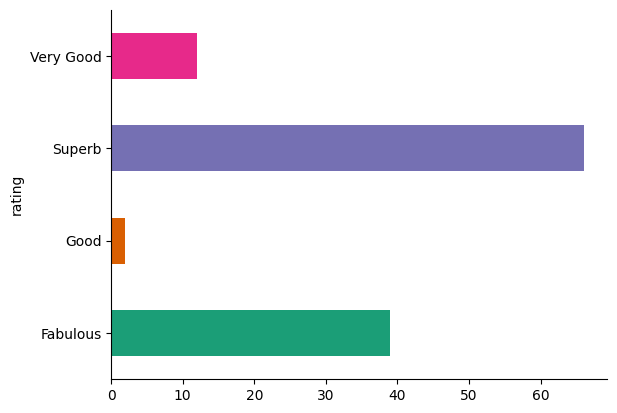

In [139]:
hostel_df.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dari Hasil informasi di atas menunjukan bahwa :


*   **Harga**: rata-rata harga hostel di tokyo untuk satu malam yaitu sebesar 11112, dan untuk harga tertinggi sebesar 1003200 sedangkan harga terendah yaitu sebesar 1300 per malam.

*   **Jarak**: Jarak terjauh hostel dari pusat kota adalah 18.1 km jarak terdekat yaitu kurang dari 1km dan rata-rata jaraknya yaitu 8.2km

* **Rating**: Rating terbanyak yang diberikan yaitu dengan label **'superb'** dengan jumlah 66 rating dari 119 rating



# Data Standarization


In [140]:
# melakukan import metode StandardScaler dari library sklearn
from sklearn.preprocessing import StandardScaler

# mengubah seluruh numeric variable pada data tempat wisata menggunakan perhitungan StandardScaler
scaled_data = StandardScaler().fit_transform(processed_hostel_df)

# hasil perhitungan StandardScaler dimasukkan kedalam dataframe
scaled_hostel_df = pd.DataFrame(scaled_data,
                                 columns=processed_hostel_df.columns)


scaled_hostel_df.head(1)

,price.from,distance,Fabulous,Good,Superb,Very Good
0,-0.082254,-0.144529,1.43223,-0.130744,-1.115922,-0.334887


# Sistem Rekomendasi

Sistem rekomendasi adalah sistem yang didesain untuk memprediksi item yang cocok dengan minat pengguna, lalu merekomendasikannya kepada pengguna. Rekomendasi ini bisa dibuat atau disusun berdasarkan kesamaan dengan item yang sudah ada, atau kesamaan dengan pengguna lain.

In [141]:
# Import libraries
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [142]:
# Extracting the values from scaled_df
scaled_data = scaled_hostel_df.values
# Getting the number of rows in the scaled_data
size = scaled_data.shape[0]

# Creating a NearestNeighbors model with 3 neighbors (k=3) and Euclidean distance metric
model = NearestNeighbors(n_neighbors=3, metric="euclidean")

Setelah mendefinisikan dan membuat variabel model, kita akan melatih model tersebut menggunakan data yang telah disiapkan. Proses pelatihan dilakukan dengan menggunakan metode fit() pada model, yang mana model akan belajar pola dan struktur data dari dataset yang telah disiapkan.


In [143]:
# Creating an array to store recommendations, initialized with zeros
recommendations = np.zeros(shape=(size,3))

# Looping over each row in the scaled_data
for i in range(size):
  # Creating a temporary array by deleting the current row
  temp = np.delete(scaled_data, i, axis=0)
  # Fitting the model with the temporary array
  model.fit(temp)
  # Generating recommendations for the current row
  recommendations[i] = model.kneighbors(scaled_data[i].reshape(1, -1), return_distance=False)
recommendations.shape

(119, 3)

In [144]:
hostel_df.head()

,id.hostel,hostel.name,city,price.from,distance,rating
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,Fabulous
3,4,&And Hostel Ueno,Tokyo,2600,8.7,Very Good
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,Superb
5,6,1night1980hostel Tokyo,Tokyo,2100,9.4,Very Good
6,7,328 Hostel & Lounge,Tokyo,3300,16.5,Superb


In [145]:
# Reset the index of both dataframes
hostel_df = hostel_df.reset_index(drop=True)

# Show adjusted scaled_df
hostel_df.head()

,id.hostel,hostel.name,city,price.from,distance,rating
0,3,&And Hostel Akihabara,Tokyo,3600,7.8,Fabulous
1,4,&And Hostel Ueno,Tokyo,2600,8.7,Very Good
2,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,Superb
3,6,1night1980hostel Tokyo,Tokyo,2100,9.4,Very Good
4,7,328 Hostel & Lounge,Tokyo,3300,16.5,Superb


In [146]:
# Creating a DataFrame from the recommendations array
recommendations_df = pd.DataFrame(recommendations).astype('int32')

# Adding a new column "Place_Name" to the recommendations_df DataFrame with values from the "Place_Name" column of the tourism_df DataFrame
recommendations_df["hostel.name"] = hostel_df["hostel.name"]
recommendations_df

,0,1,2,hostel.name
0,57,31,52,&And Hostel Akihabara
1,36,104,62,&And Hostel Ueno
2,82,69,14,&And Hostel-Asakusa North-
3,80,29,104,1night1980hostel Tokyo
4,17,39,116,328 Hostel & Lounge
...,...,...,...,...
114,82,36,95,With B
115,96,115,50,YADOYA Guesthouse Green
116,96,115,50,YADOYA Guesthouse Orange
117,55,4,18,YAWP! backpackers


Karena rekomendasi masih dalam berbentuk indeks tempat (23, 8, 25, dst), kita akan mengembalikannya kembali menjadi nama tempat yang sesuai.

In [147]:
# Retrieve the place name from tourism_df based on the index

def get_name(x):
  return hostel_df.loc[x]['hostel.name']

for i in range(3):
  recommendations_df[i] = recommendations_df[i].apply(lambda x: get_name(x))

In [148]:
recommendations_df.head(5)

,0,1,2,hostel.name
0,Ikidane House Asakusa Hatago,Good Diner Inn Copain,Hostel＆Café East57 Asakusabashi,&And Hostel Akihabara
1,Guest House Shinagawa-shuku Tokyo,Tokyo Hutte,J's Backpackers,&And Hostel Ueno
2,Oakhostel Cabin,Khaosan Tokyo Laboratory,Asakusa Ryokan Toukaisou,&And Hostel-Asakusa North-
3,Oak Hostel Zen,ENAKA Asakusa Central Hostel,Tokyo Hutte,1night1980hostel Tokyo
4,Backpackers Hostel K's House Tokyo,Guesthouse Kagaribi,YADOYA Guesthouse Orange,328 Hostel & Lounge


# Evaluation

Di bagian ini, kita akan melakukan evaluasi model menggunakan metrik Precision@K untuk sistem rekomendasi. Hal yang kita pertimbangkan adalah harga dari setiap rekomendasi.

Jika harga sama atau mendekati dengan harga yang diharapkan, maka tidak akan dianggap sebagai error, dan sebaliknya.

In [149]:
evaluation_by_price= pd.DataFrame(recommendations, dtype='int32') # Creating a DataFrame from the recommendations array
evaluation_by_price["price.from"] = hostel_df["price.from"] # Adding a new column "price" to the evalution_by_price DataFrame with values from the "price.from" column of the tourism_df DataFrame

# Retrieve category from tourism_df based on index
def get_price(x):
  return hostel_df.loc[x]["price.from"]

for i in range(3):
  evaluation_by_price[i] = evaluation_by_price[i].apply(lambda x: get_price(x))

evaluation_by_price.head(5)


,0,1,2,price.from
0,2000,3300,2200,3600
1,3300,3000,1600,2600
2,2100,2600,3600,1500
3,2200,2600,3000,2100
4,2100,2200,2000,3300


In [150]:
sumError = [0, 0, 0] #initialize zeros
for i in range(size):
  for j in range(3):
    # check how many erros (different category) per recommendations
    if evaluation_by_price.loc[i]['price.from'] != evaluation_by_price.loc[i][j]:
      sumError[j] += 1

n = recommendations_df.shape[0]

print("berdasarkan kesamaan harga dari ", n, "baris data")
print("jumlah error di rekomendasi pertama: ", sumError[0])
print("jumlah error di rekomendasi kedua: ", sumError[1])
print("jumlah error di rekomendasi ketiga : ", sumError[2])

berdasarkan kesamaan harga dari  119 baris data
jumlah error di rekomendasi pertama:  114
jumlah error di rekomendasi kedua:  108
jumlah error di rekomendasi ketiga :  116


In [151]:
# Print precision@K scores
print("Precision on 1st recommendation:", (n - sumError[0])/n)
print("Precision on 2st recommendation:", (n - sumError[1])/n)
print("Precision on 3rd recommendation:", (n - sumError[2])/n)

Precision on 1st recommendation: 0.04201680672268908
Precision on 2st recommendation: 0.09243697478991597
Precision on 3rd recommendation: 0.025210084033613446


### Kesimpulan

Findings:

* Hubungan harga dengan jarak hostel dari pusat kota memiliki korelasi negatif yang kuat, yang artinya semakin kecil jarak hostel dengan pusat kota harganya semakin tinggi.

* Harga: rata-rata harga hostel di tokyo untuk satu malam yaitu sebesar 11112, dan untuk harga tertinggi sebesar 1003200 sedangkan harga terendah yaitu sebesar 1300 per malam.

* Jarak: Jarak terjauh hostel dari pusat kota adalah 18.1 km jarak terdekat yaitu kurang dari 1km dan rata-rata jaraknya yaitu 8.2km

* Rating: Rating terbanyak yang diberikan yaitu dengan label 'superb' dengan jumlah 66 rating dari 119 rating

* Terdapat variasi dalam tingkat presisi antara rekomendasi pertama, kedua, dan ketiga, dengan jumlah angka error yang tinggi mendekati jumlah baris data. Sehingga secara keseluruhan, sistem rekomendasi menunjukkan bahwa kemampuan untuk memberikan rekomendasi yang relevan dapat dikatakan kurang relevan, dengan presisi paling tinggi di rekomendasi kedua.

* Evaluasi lebih lanjut dapat dilakukan dengan melajukan survei atau analisis feedback pengguna terhadap rekomendasi yang diberikan

* Performa model dapat ditingkatkan dengan beberapa cara, seperti penggunaaan fitur tambahan, pemrosesan data tambahan, menyesuaikan parameter model, atau bahkan mencoba model lain.
